The range of the points is :  (-90, 90)
the length of px is :  90
the length of py is :  90
Points: [Point(83.73, 41.23), Point(-69.59, 16.09), Point(-33.91, -12.87), Point(-64.24, -49.57), Point(-5.84, -55.85), Point(-2.83, -45.26), Point(-18.13, 47.68), Point(63.29, -16.73), Point(-20.93, 7.84), Point(27.57, 75.54), Point(10.01, -69.78), Point(-86.21, -17.01), Point(-21.68, 33.46), Point(-64.95, -59.18), Point(64.61, -58.15), Point(85.61, 37.66), Point(61.70, 14.06), Point(28.77, 76.28), Point(-13.45, -51.51), Point(-82.18, 17.36), Point(78.78, -18.78), Point(-70.42, 53.53), Point(-54.67, 53.05), Point(21.89, -70.16), Point(43.71, -69.97), Point(7.67, 21.07), Point(-77.84, -26.73), Point(77.29, -34.40), Point(54.13, 49.16), Point(-24.35, 9.87), Point(-13.89, 64.26), Point(-0.07, 43.05), Point(-72.88, -9.60), Point(58.88, -54.26), Point(-31.71, -63.57), Point(61.66, 23.22), Point(-31.77, -36.60), Point(-73.31, 21.20), Point(20.17, -33.30), Point(-88.46, 40.75), Point(84.00, -33.56), P

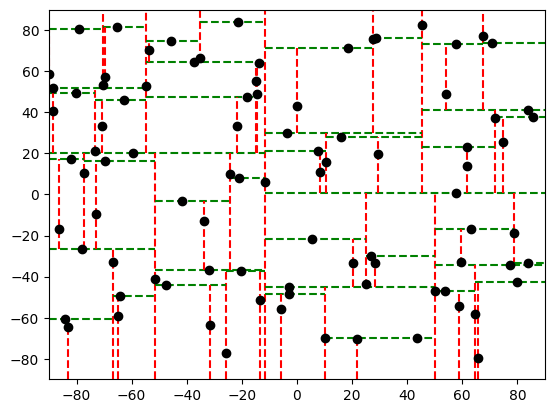

Point Point(-11.67, 5.86) is within bounds [-85, 85, -85, 85]
Point Point(-59.39, 20.39) is within bounds [-85, 85, -85, 85]
Point Point(-51.49, -41.36) is within bounds [-85, 85, -85, 85]
Point Point(-77.84, -26.73) is within bounds [-85, 85, -85, 85]
Point Point(-66.82, -32.68) is within bounds [-85, 85, -85, 85]
Point Point(-84.21, -60.56) is within bounds [-85, 85, -85, 85]
Point Point(-83.23, -64.36) is within bounds [-85, 85, -85, 85]
Point Point(-64.24, -49.57) is within bounds [-85, 85, -85, 85]
Point Point(-64.95, -59.18) is within bounds [-85, 85, -85, 85]
Point Point(-77.34, 10.51) is within bounds [-85, 85, -85, 85]
Point Point(-82.18, 17.36) is within bounds [-85, 85, -85, 85]
Point Point(-69.59, 16.09) is within bounds [-85, 85, -85, 85]
Point Point(-72.88, -9.60) is within bounds [-85, 85, -85, 85]
Point Point(-31.77, -36.60) is within bounds [-85, 85, -85, 85]
Point Point(-25.92, -77.10) is within bounds [-85, 85, -85, 85]
Point Point(-47.57, -43.85) is within bounds [-

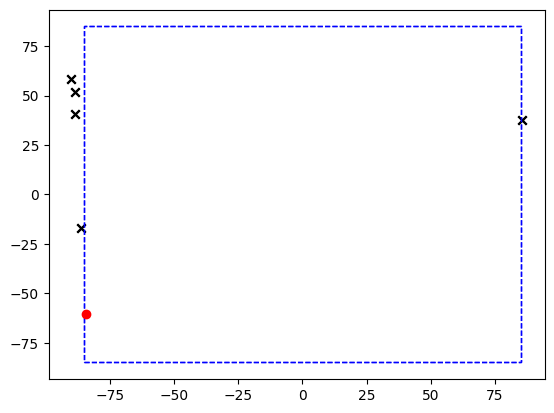

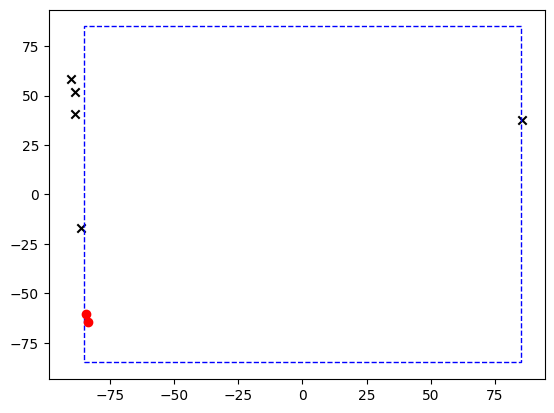

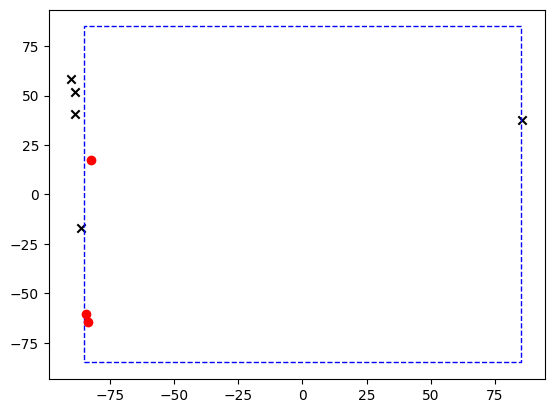

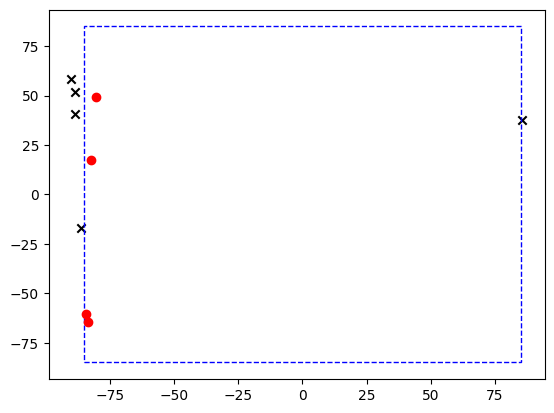

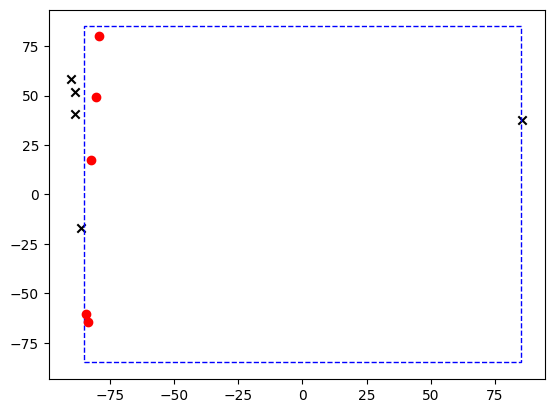

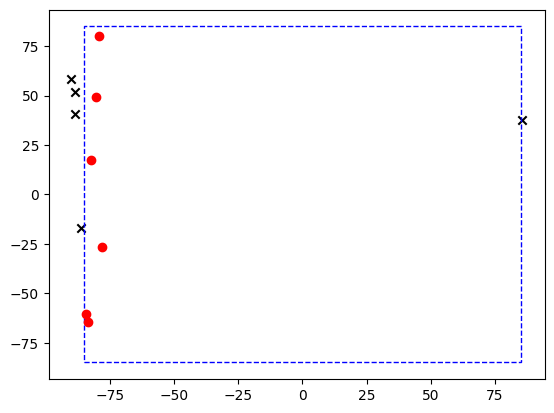

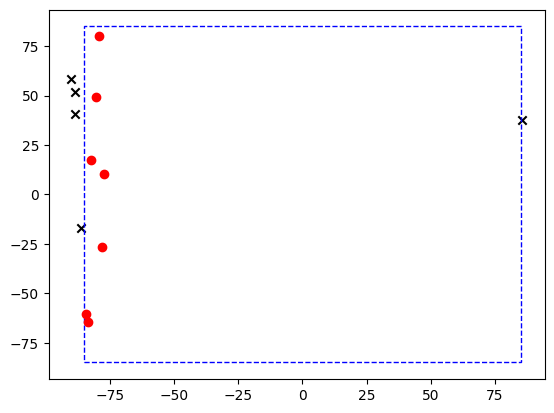

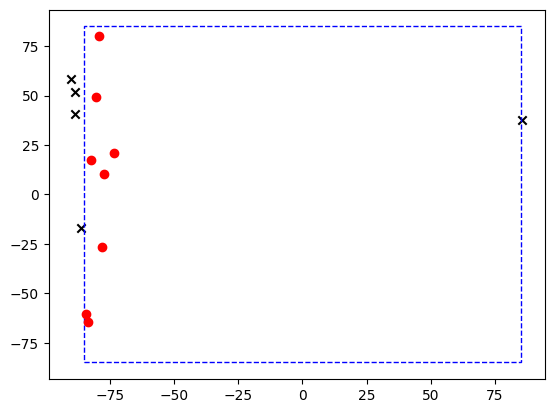

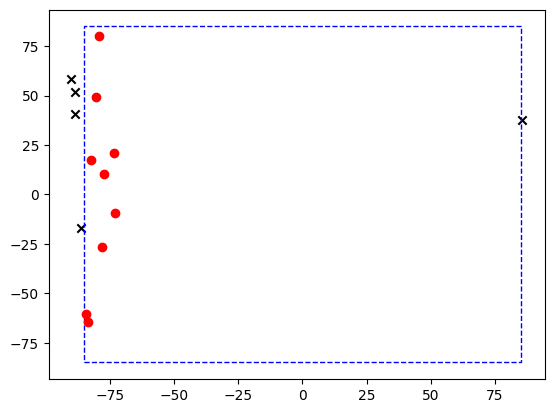

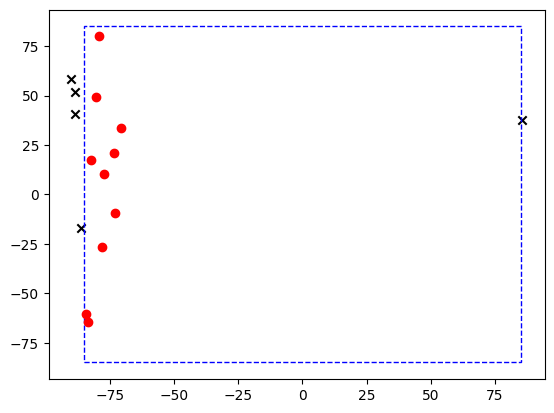

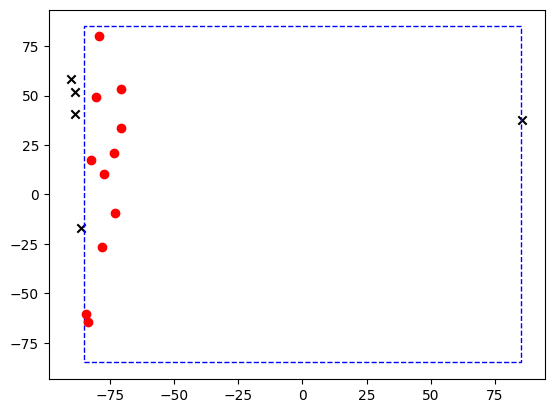

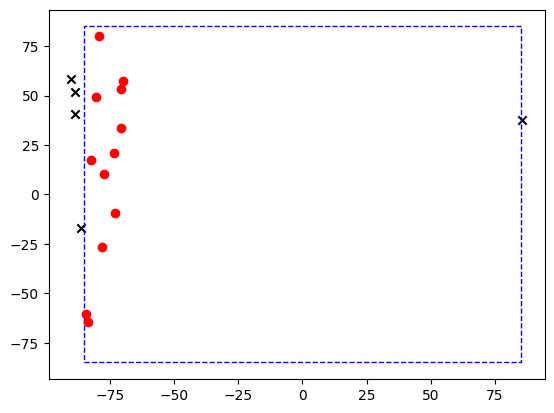

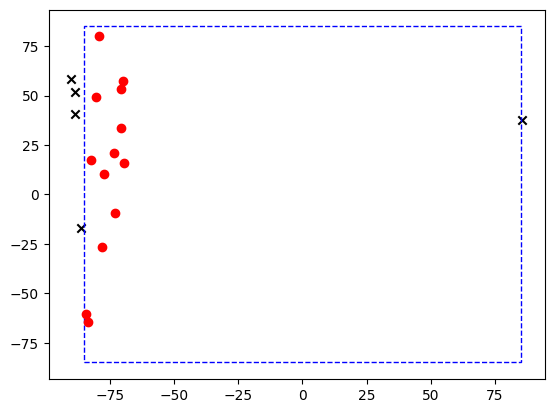

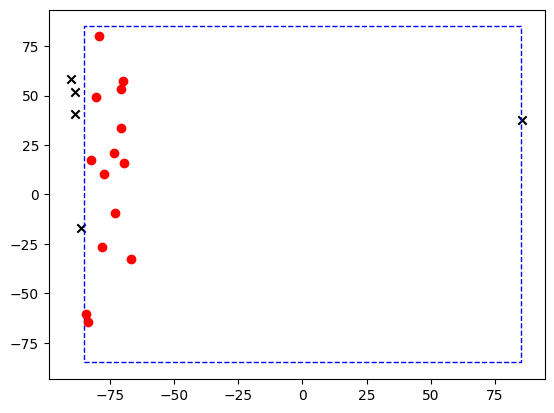

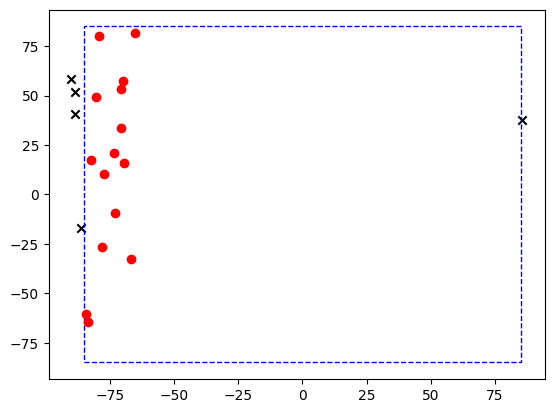

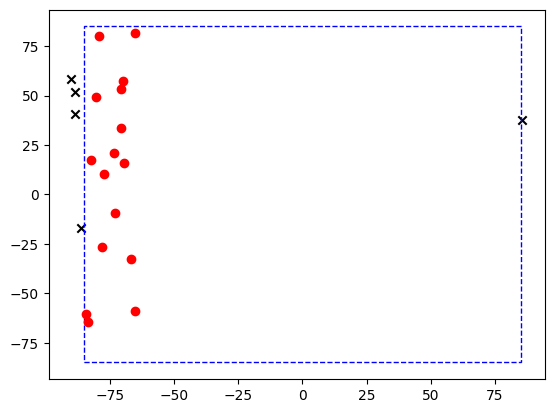

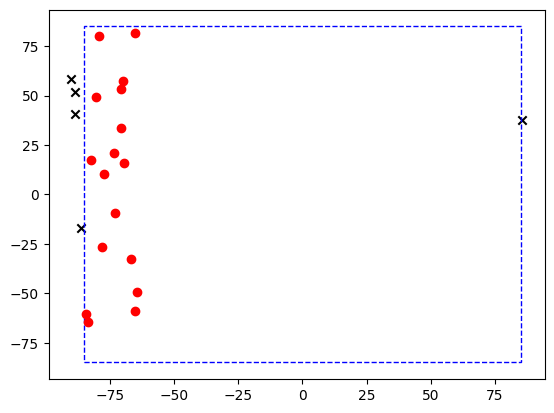

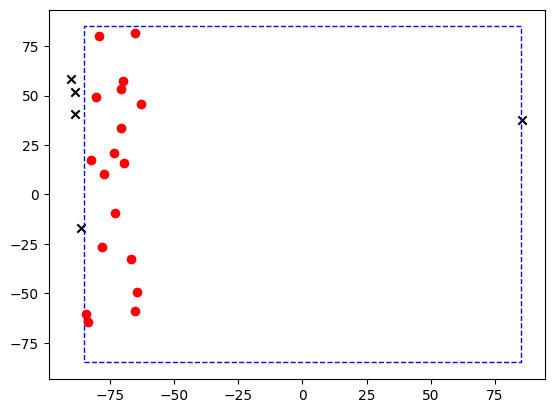

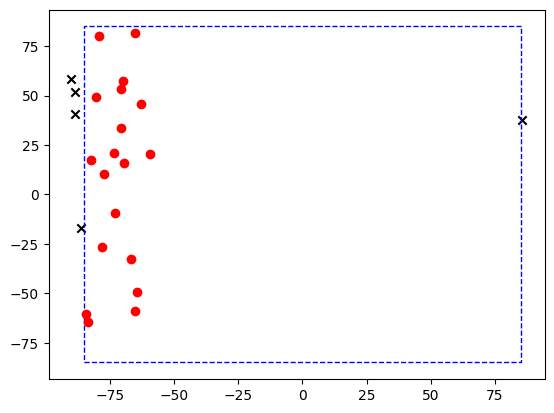

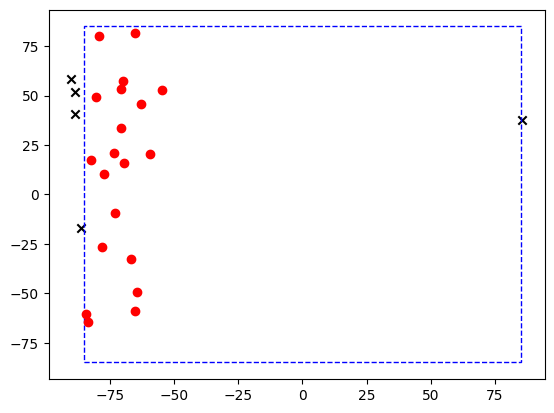

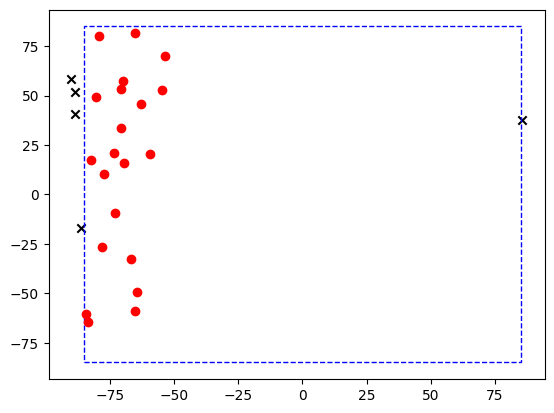

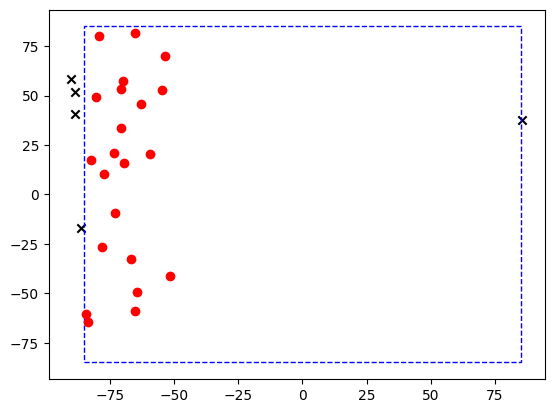

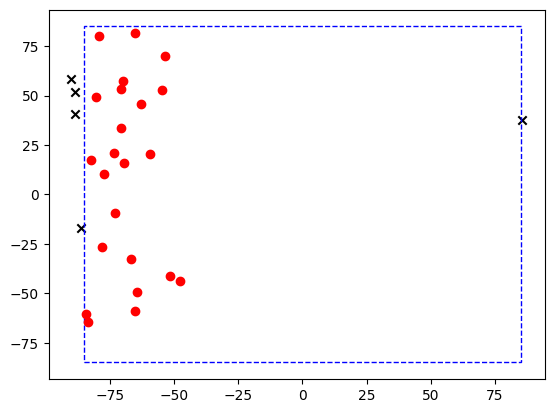

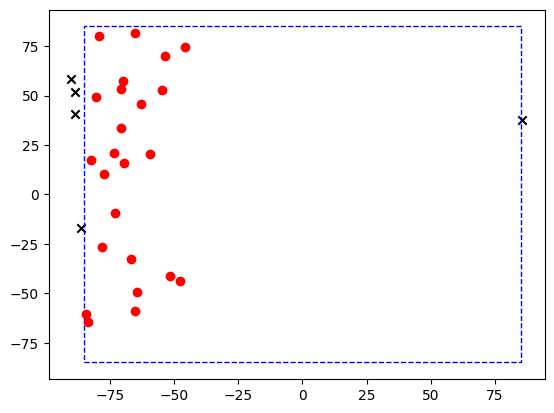

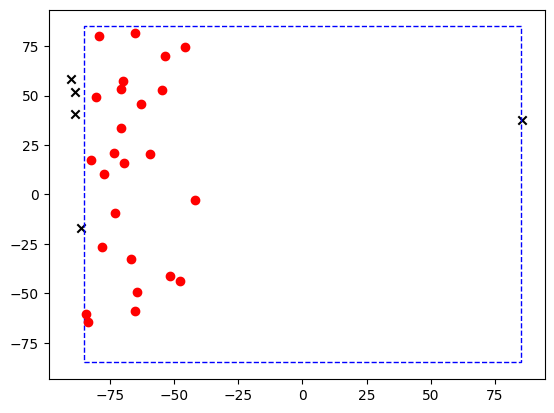

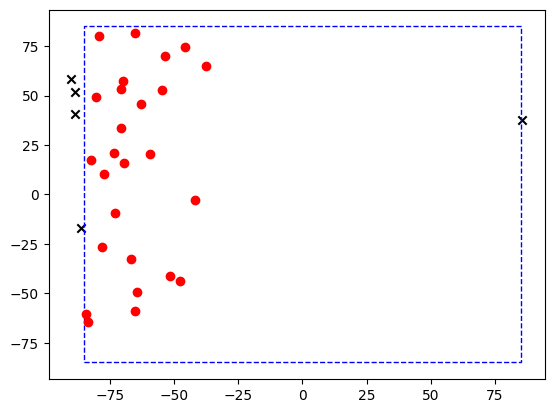

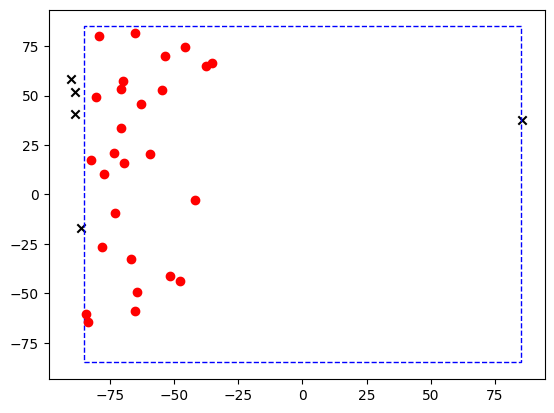

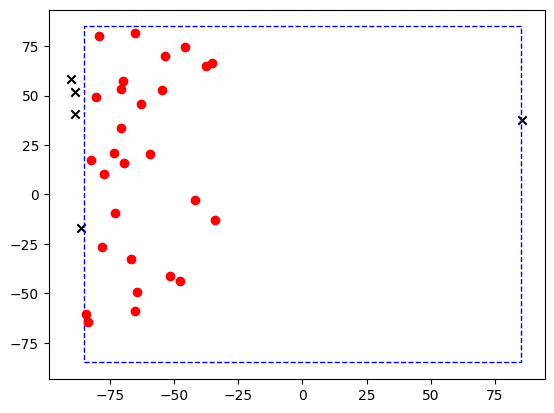

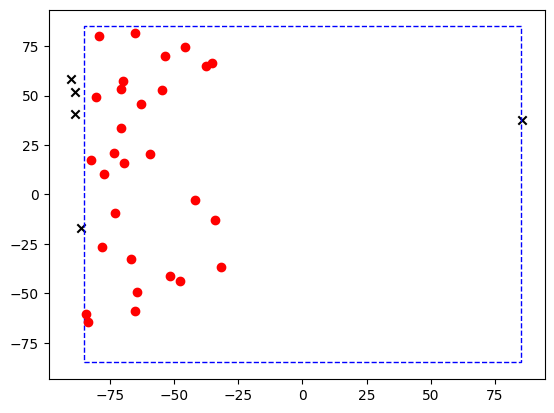

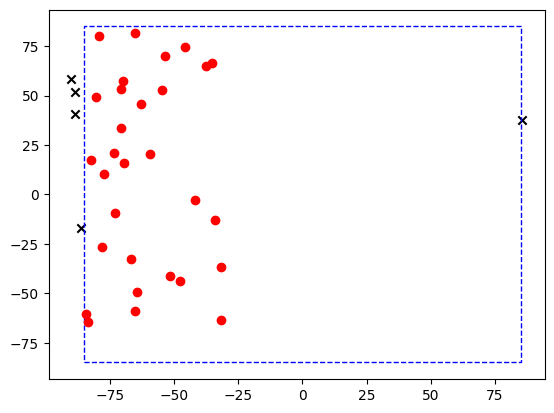

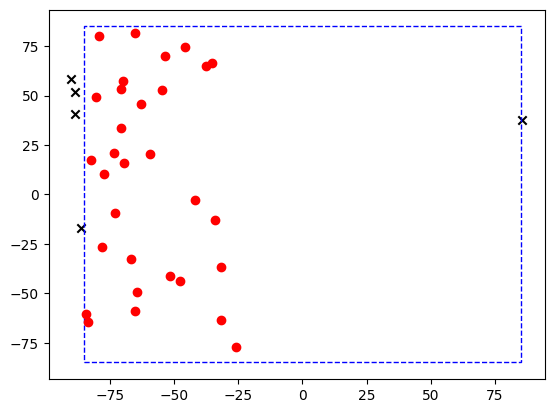

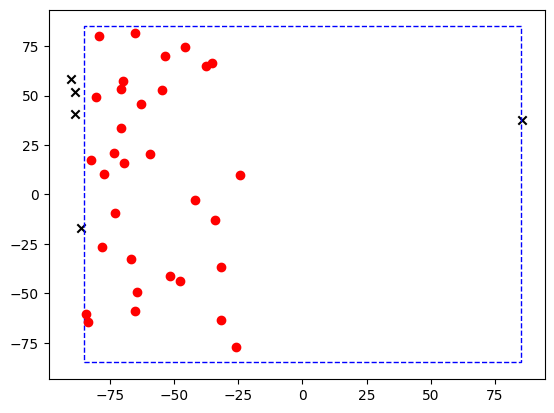

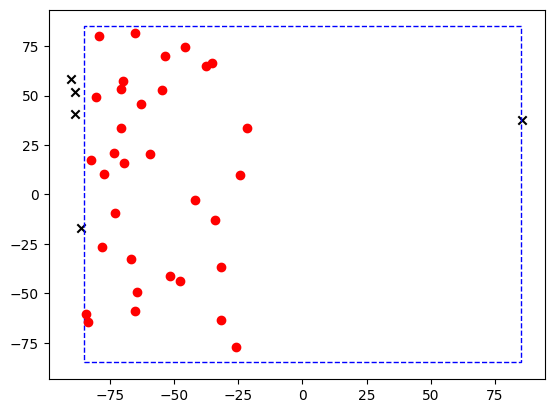

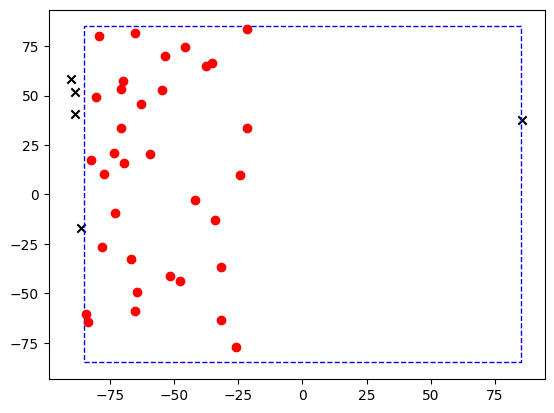

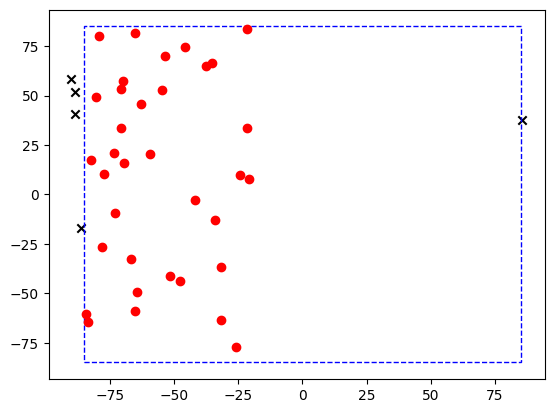

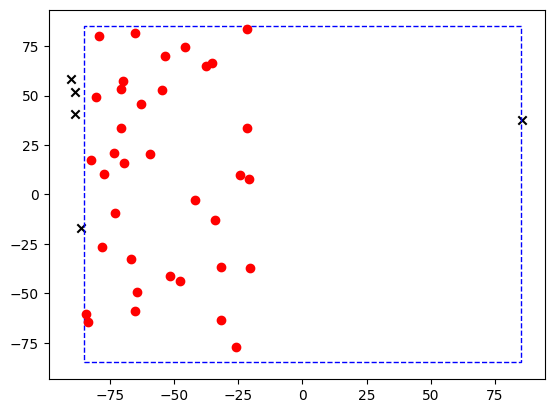

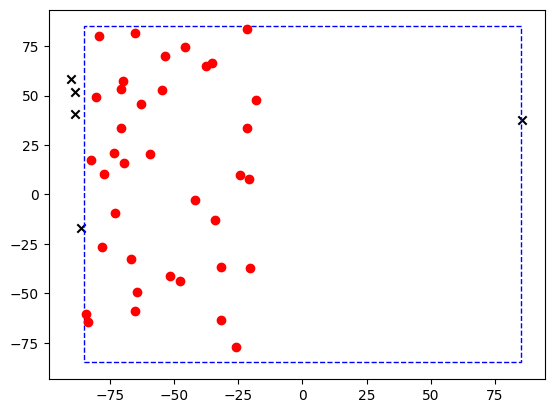

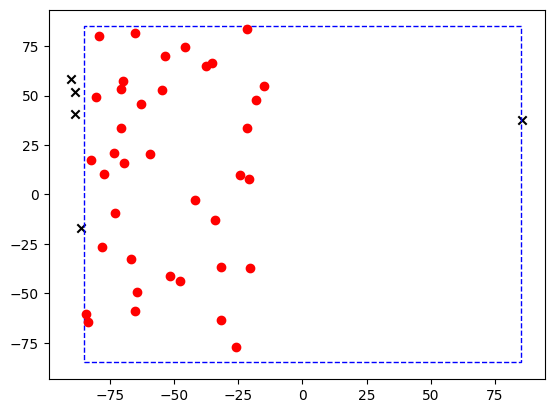

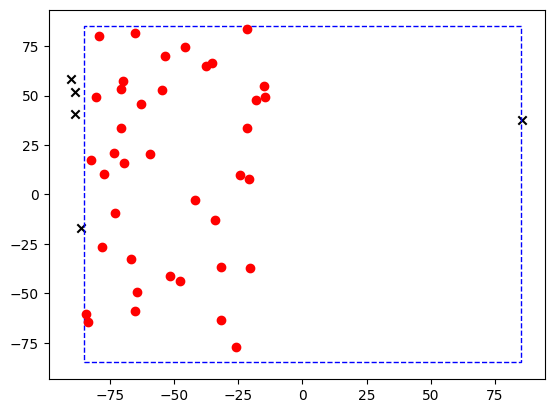

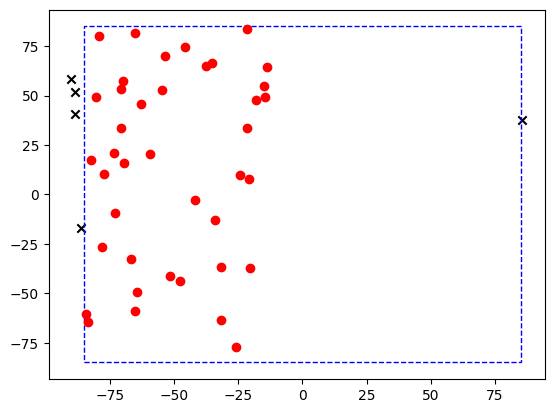

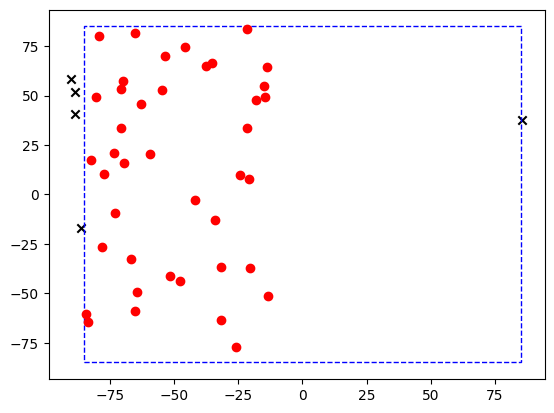

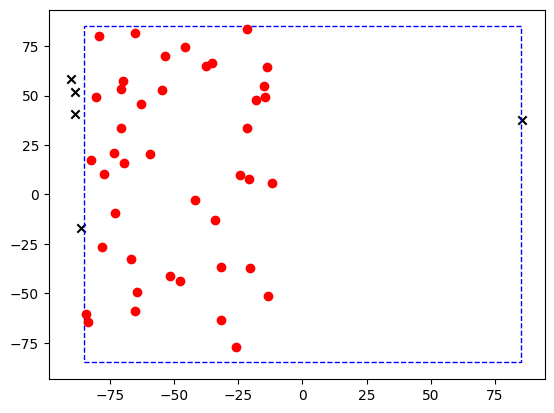

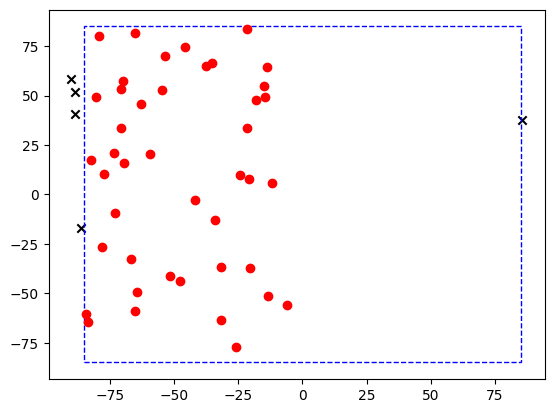

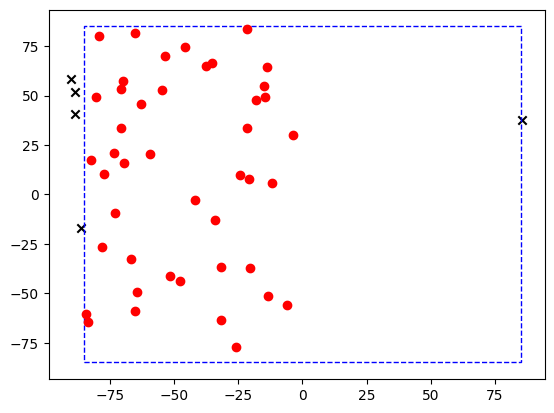

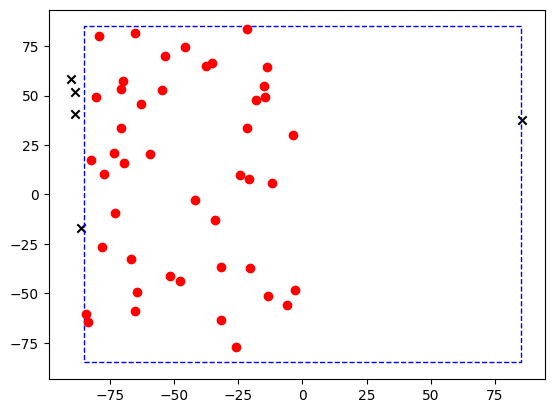

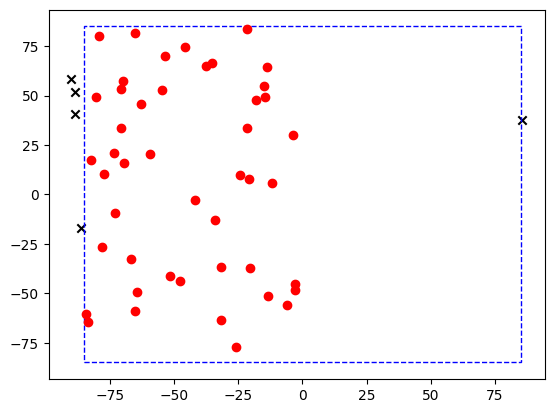

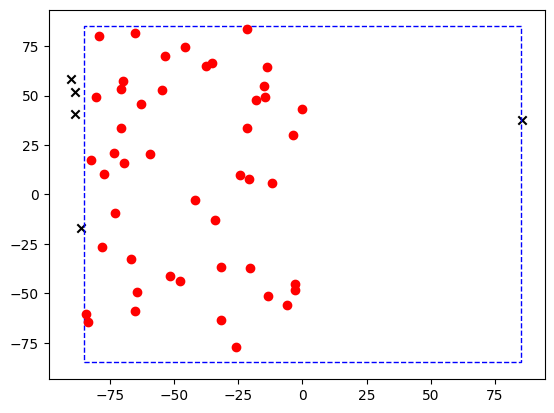

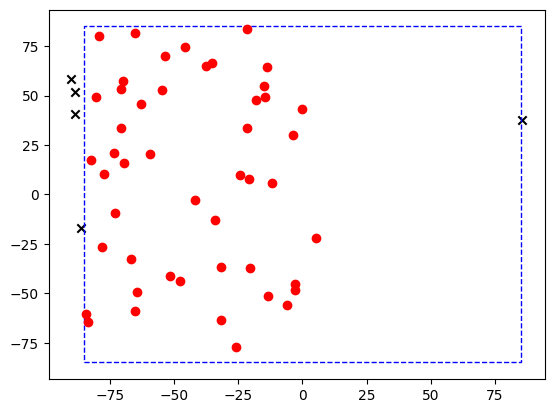

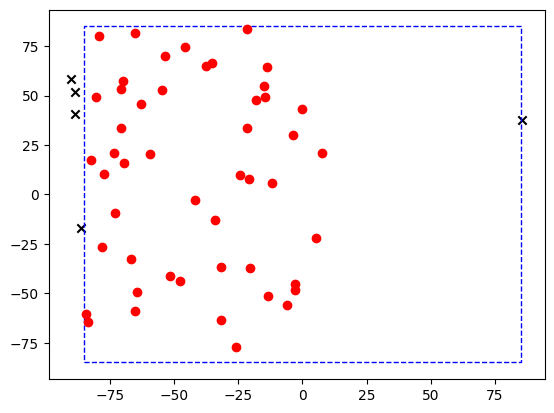

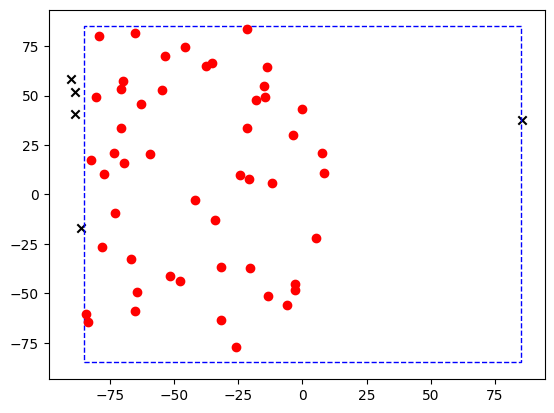

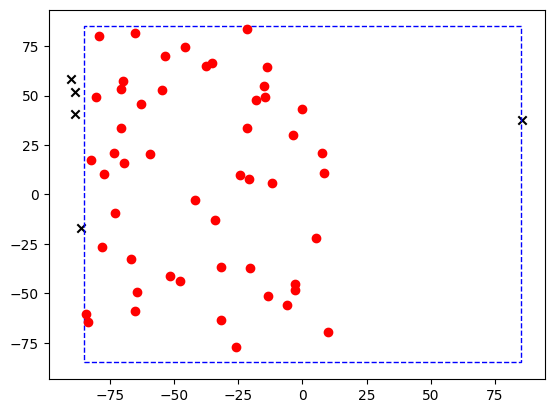

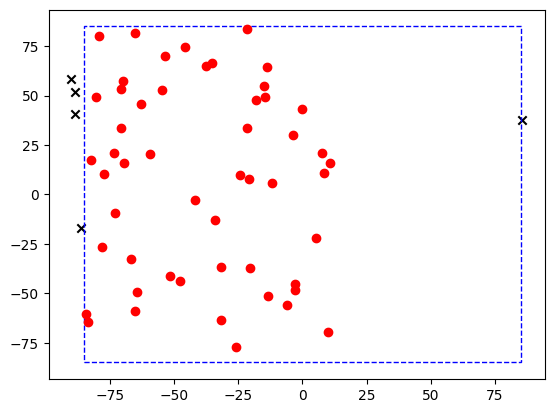

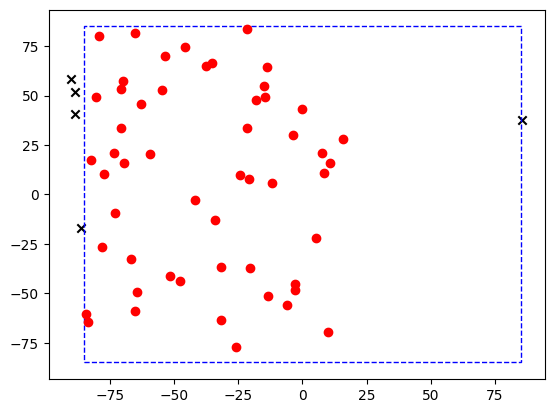

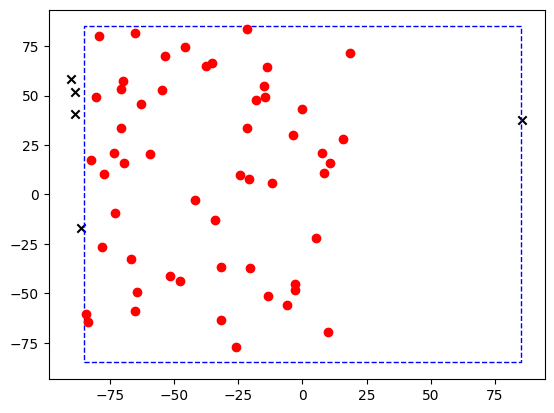

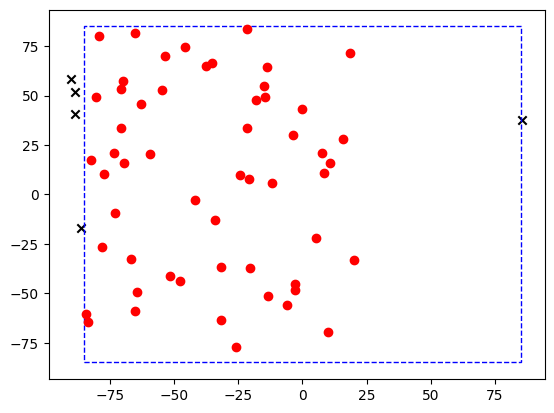

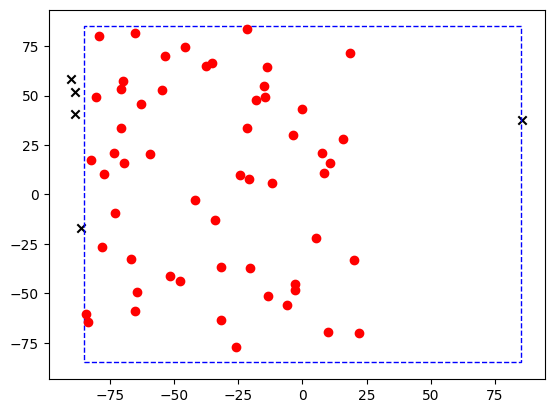

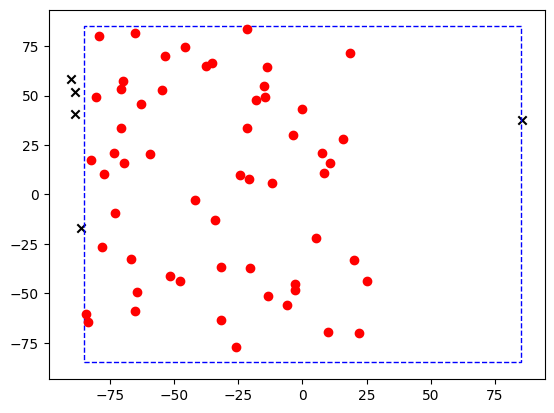

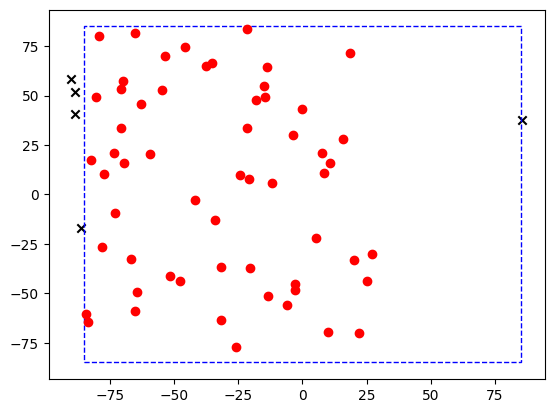

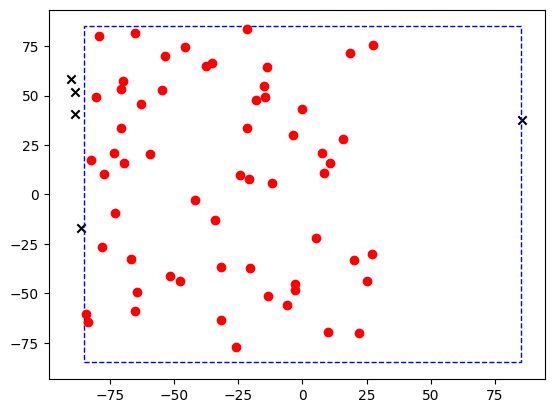

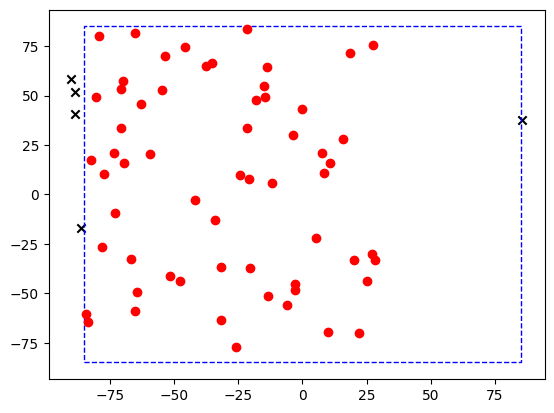

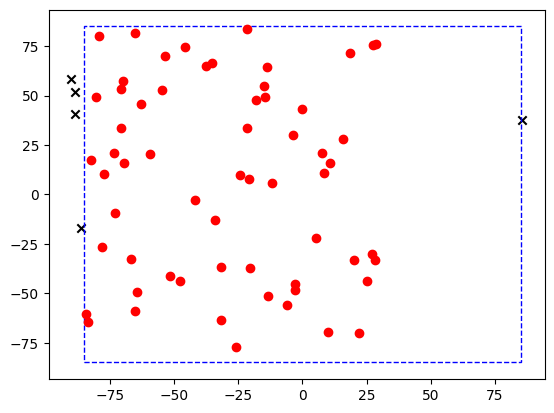

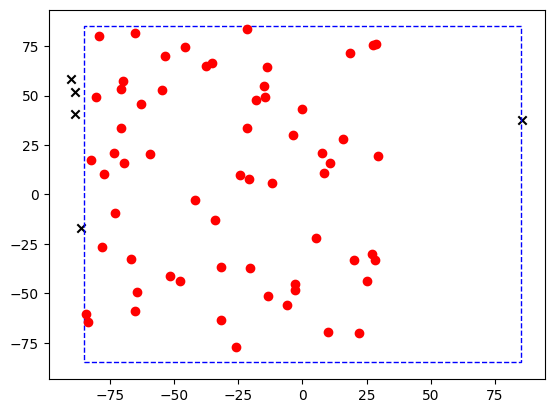

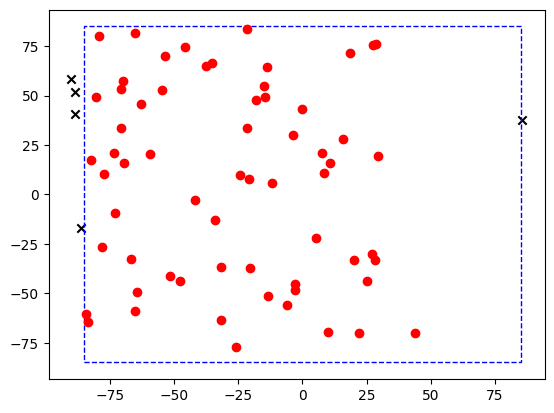

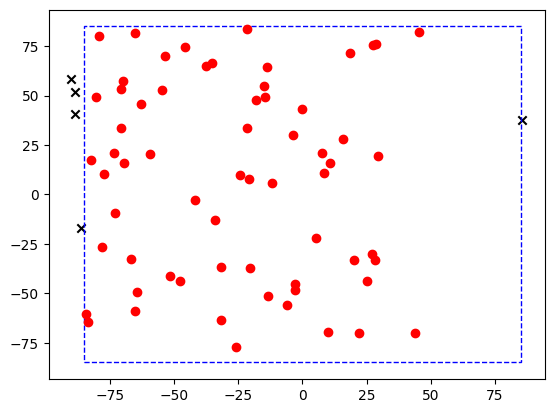

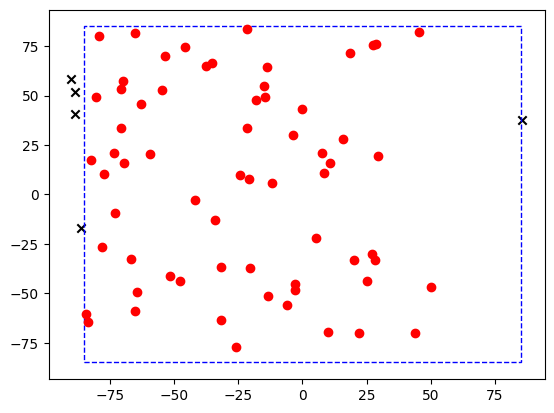

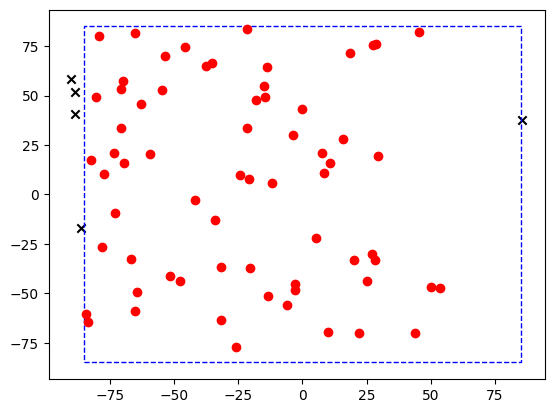

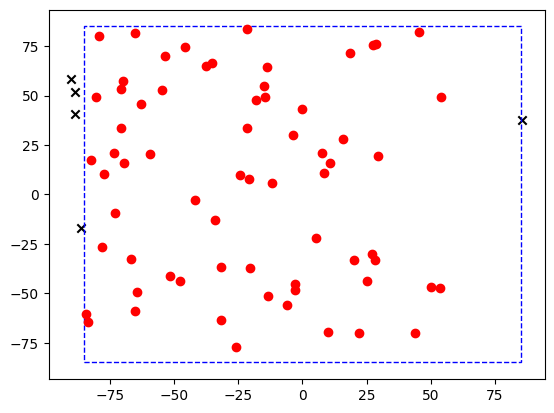

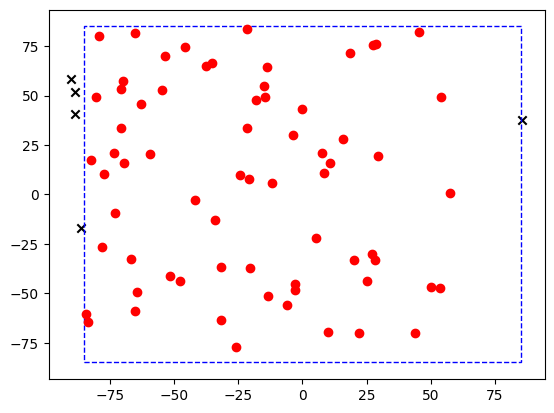

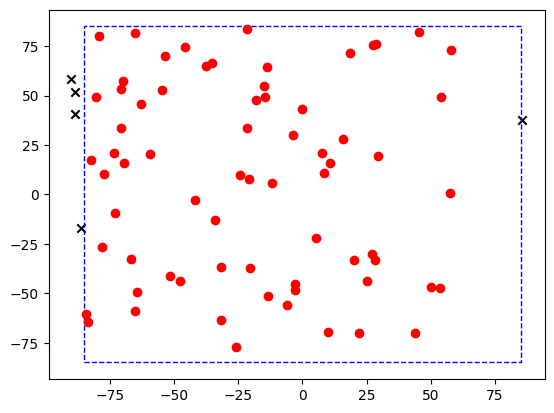

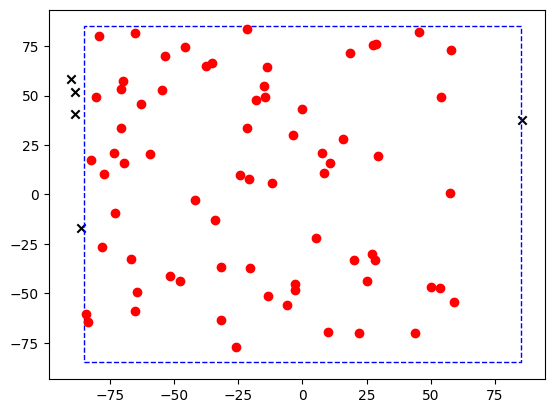

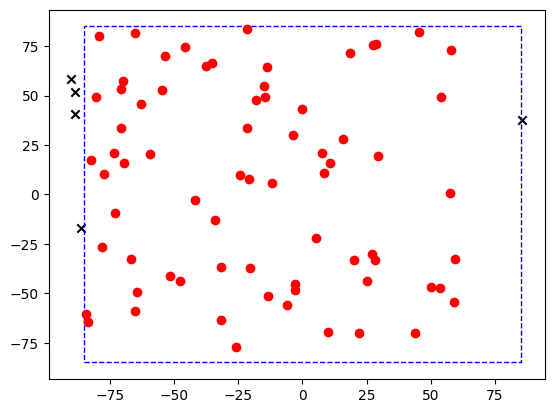

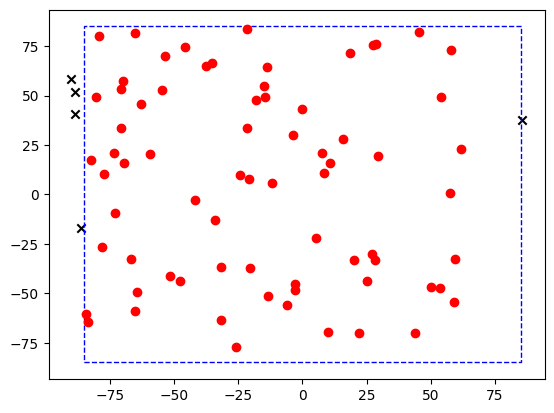

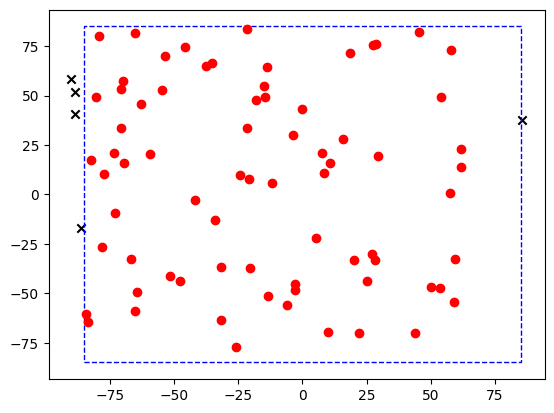

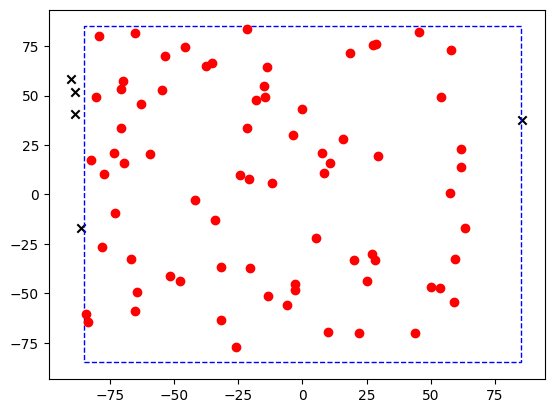

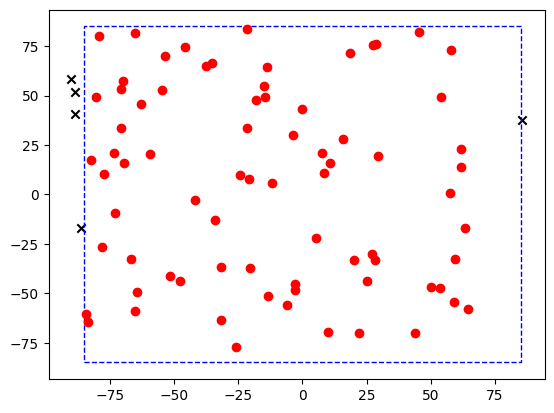

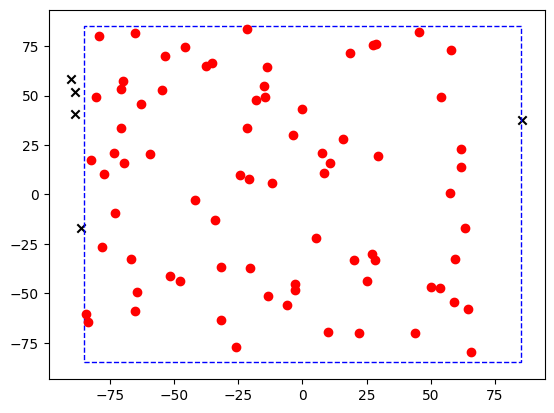

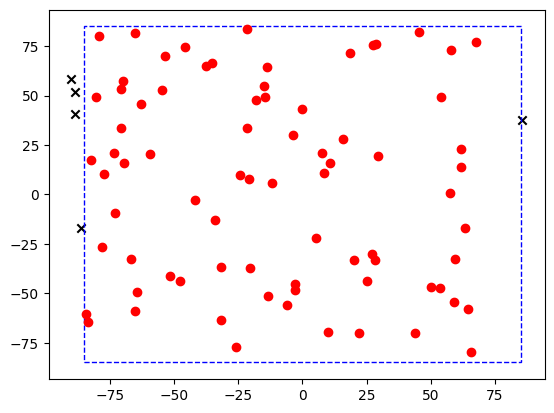

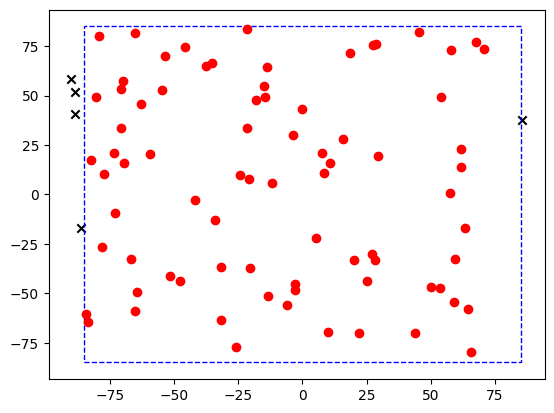

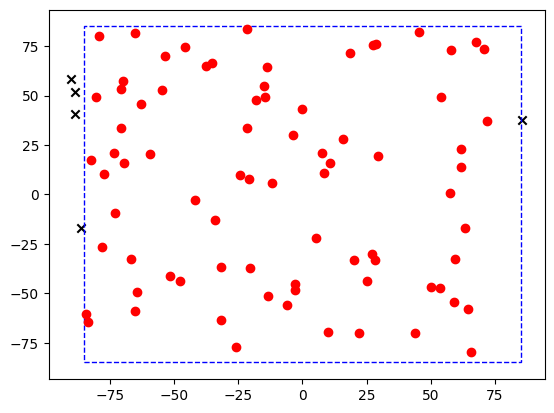

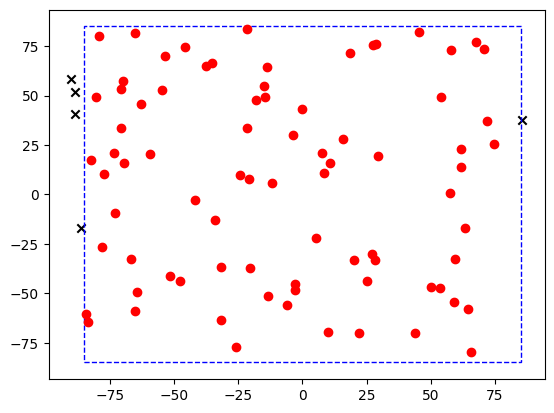

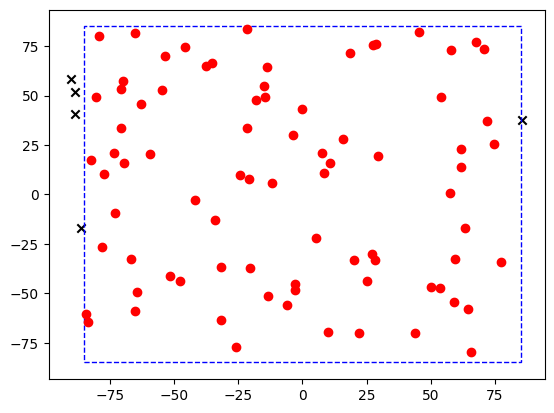

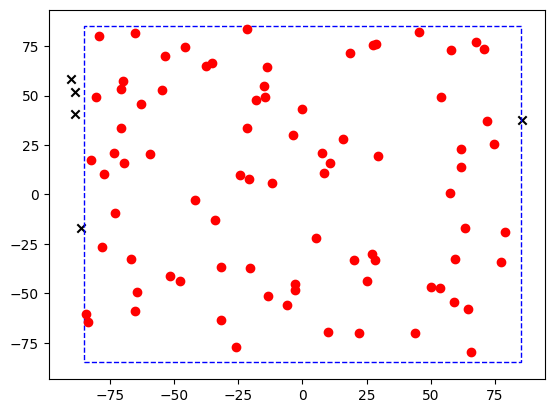

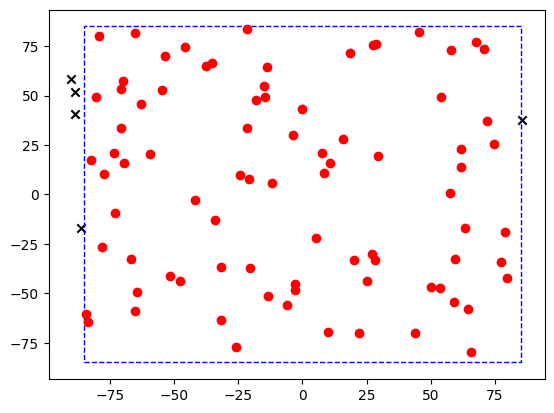

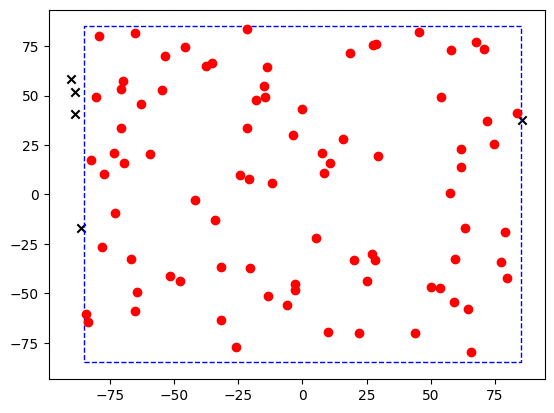

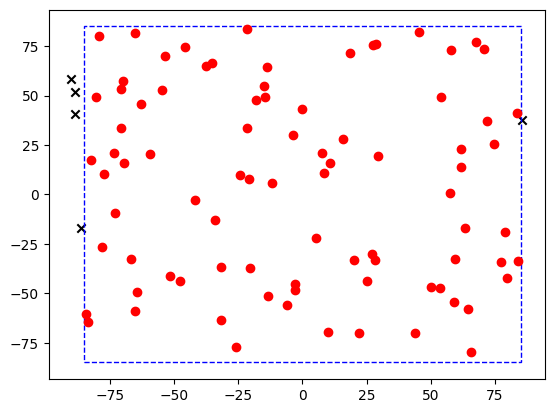

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt


#I initiate a class called point , so as to use it in the node of the KD-Tree.
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return f"Point({self.x:.2f}, {self.y:.2f})"

#With this function , the Euclidean Distance is computed.
def distance(point1: Point, point2: Point):
    return np.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

class KDNode:
    def __init__(self, point, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right

    def __repr__(self):
        return f"KDNode({self.point})"
    
    #The length of each node equals to 2, because each point consists of two coordinates.
    def __len__(self):
        return 2

#This function builds a KD-Tree recursively. The depth is used to determine the axis for splitting the points.
#The axis is determined by the depth modulo k, where k is the number of dimensions (2 in this case).
#The points are sorted based on the current axis, and the median point is chosen as the root of the subtree.
#The left and right subtrees are built recursively with the remaining points.
def KDTree(points:list,depth=0):
    #If the list of points is empty, then the KD-Tree is None.
    if not points:
        return None

    k=2
    axis=depth % k
    sorted_points = sorted(points, key=lambda p: (p.x,p.y)[axis])
    #The chosen index is the upper bound of n/2.
    median_index = len(sorted_points) // 2
    #At first, I initialize my KD-Tree by adding the median-index node , and then I recursively add up the nodes 
    node=KDNode(sorted_points[median_index])
    node.left = KDTree(sorted_points[:median_index], depth + 1)
    node.right = KDTree(sorted_points[median_index + 1:], depth + 1)

    return node

#With this function, the KD-Tree is plotted
def Plot(node:KDNode,depth:int,bounds:list,ax=None):
    if node is None:
        return None
    
    if ax is None:
        fig,ax=plt.subplots()
        ax.set_xlim(bounds[0],bounds[1])
        ax.set_ylim(bounds[2],bounds[3])

    x_min,x_max,y_min,y_max=bounds
    x,y=node.point.x,node.point.y
    axis=depth%2

    if axis==0:
        ax.plot([x,x],[y_min,y_max],'r--')
        Plot(node.left,depth+1,[x_min,x,y_min,y_max],ax)
        Plot(node.right,depth+1,[x,x_max,y_min,y_max],ax)
    if axis==1:
        ax.plot([x_min,x_max],[y,y],'g--')
        Plot(node.left,depth+1,[x_min,x_max,y_min,y],ax)
        Plot(node.right,depth+1,[x_min,x_max,y,y_max],ax)
    ax.plot(x,y,'ko')

def Print(node:KDNode,depth):
    if node is None:
        return node
    else:
        print(node)
        Print(node.left,depth+1)
        Print(node.right,depth+1)

def RangeSearch(node:KDNode,bounds:list,depth,results=None):
    if node is None:
        return []
    
    x_min, x_max, y_min, y_max = bounds
    x=node.point.x
    y=node.point.y
    axis = depth % 2

    if x_min <= x <= x_max and y_min <= y <= y_max:
        print(f"{node.point} is within bounds {bounds}")
        if results is None:
            results = []
        results.append(node.point)

    if axis == 0:  # Vertical line
        if x_min <= node.point.x:
            RangeSearch(node.left, bounds, depth + 1, results)
        if x_max >= node.point.x:
            RangeSearch(node.right, bounds, depth + 1, results)
    else:
        if y_min <= node.point.y:
            RangeSearch(node.left, bounds, depth + 1, results)
        if y_max >= node.point.y:
            RangeSearch(node.right, bounds, depth + 1, results)    
    
    return results


#In this function, i sort the points in ascending order by their x-coordinate.
def PlotStepByStep(points:list,x_min:int,x_max:int,y_min:int,y_max:int,s:list):
    sorted_points=sorted(s,key=lambda point:point.x)
    pointslist=[]

    inside = sorted(s, key=lambda p: p.x)
    outside = [p for p in points if p not in s]
    a=[point.x for point in outside]
    b=[point.y for point in outside]
    
    plt.scatter(a,b,marker='x',color='black')
    rect = plt.Rectangle((x_min, y_min), x_max-x_min, y_max-y_min, edgecolor='blue', facecolor='none', linestyle='--')
    plt.gca().add_patch(rect)
    for point in sorted_points:
        plt.scatter(a,b,marker='x',color='black')
        rect = plt.Rectangle((x_min, y_min), x_max-x_min, y_max-y_min, edgecolor='blue', facecolor='none', linestyle='--')
        plt.gca().add_patch(rect)
        pointslist.append((point.x,point.y))
        xs,ys=zip(*pointslist)
        plt.plot(xs, ys, 'ro')
        plt.show()
    
if __name__ == "__main__":
    print("Welcome to the KD-Tree Range Search Program!")
    print("This program allows you to create a KD-Tree from random points and perform a range search.")
    print("You will be prompted to enter the range of coordinates for the points and the number of points.")
    print("Then, you will specify the range for the x-axis and y-axis for the range search.")    
#Here you insert the range of the coordinates of the points and the number of points. Both x,y are properly sanitized.
    x=abs(int(input("Give me number x (The range of points): ")))
    y=abs(int(input("Give me number y (The number of points): ")))
    print("The range of the points is : ",(-x,x))
#Here you insert the ranges of the query search for the x-axis and the y-axis.
    x_min=int(input("Give me number x_min (The minimum x-value): "))
    x_max=int(input("Give me number x_max (The maximum x-value): "))
    y_min=int(input("Give me number y_min (The minimum y-value): "))
    y_max=int(input("Give me number y_max (The maximum y-value): "))
    L = [Point(np.random.uniform(-x,x), np.random.uniform(-x,x)) for _ in range((y))]
#The points are printed for further comprehension.
    print("Points:", L)
    kd_tree=KDTree(L)
    Plot(kd_tree, 0, [-x,x,-x,x], None)
    plt.show()

    s=RangeSearch(kd_tree,[x_min,x_max,y_min,y_max],0)
#A result in the range query search has been found.
    if s is not None:
        print(str(len(s))+str(" points were found "))
        PlotStepByStep(L,x_min,x_max,y_min,y_max,s)
#If s is equal to None, then x or y or both are out of range.
    elif s is None:
        print("Range Search is unsuccessful")